In [1]:
import pandas as pd
from matplotlib.lines import Line2D
from matplotlib import pyplot as plt
from utils import setup_plotting_standards, basic_formatting
import numpy as np

setup_plotting_standards()
COLOR = '#343434'

color_map = {
    "Zambia" : "#009E73", # green
    "Mozambique" : "#56B4E9", # blue
    "Nigeria" : "#0072B2",  # reddish-purple
    "Cameroon" : "#d50000", # brown 
    "Democratic Republic of the Congo" : COLOR, #Black
    "Uganda" : "#F0E442",
    "Malawi" : "#E69F00", # orange
    "Other" : "#C8C8C8" # grey
}

# Figure 2B: Lineage counts over time
Here we determine whether the genomes generated by CholGEN are derived from novel introductions or previously described introductions into Africa.

First, we load the metadata for the CholGEN sequences and the publicly available background sequences. We also indicate that small lineages T16 and T17 are sporadic lineages that don't need to be deliminated.

In [5]:
md = list()
for file in ["supplemental_data1.csv", "supplemental_data2.csv"]:
    df = pd.read_csv( "../data/" + file, usecols=["taxa", "country", "te", "collection_year"] )
    df["workshop"] = (file == "supplemental_data1.csv")
    md.append( df )
    
md = pd.concat( md )
md["te"] = md["te"].replace( {"T16" : "sporadic", "T17" : "sporadic"})
md.head()

,taxa,collection_year,country,te,workshop
0,Africa|CMR|CMR_CEN005NA35|T12|2023-04-12,2023.0,Cameroon,T12,True
1,Africa|CMR|CMR_CEN032BM-B48|T12|2023-05-04,2023.0,Cameroon,T12,True
2,Africa|CMR|CMR_E05557442|T12|2023-05-12,2023.0,Cameroon,T12,True
3,Africa|CMR|CMR_CEN030DA43|T12|2023-05-03,2023.0,Cameroon,T12,True
4,Africa|CMR|CMR_CEN027NV44|T12|2023-05-01,2023.0,Cameroon,T12,True


The background dataset contains all pubicly available sequences. However, only third-wave 7PET lineages are currently circulating in Africa. Therefore, we limited the analysis to wave three. Here we calculate the lineages collected per year per country.

In [7]:
wave3 = ["T9", "T10", "T11", "T12", "T13", "T14", "T15", "sporadic"]
counts = md.loc[md["te"].isin(wave3)].pivot_table( index="collection_year", columns=["workshop","country","te"], values="taxa", aggfunc="count", fill_value=0, dropna=False )

We use a dot plot to visualize the number of genomes assigned to each lineage collected in each CholGEN Member State per year.

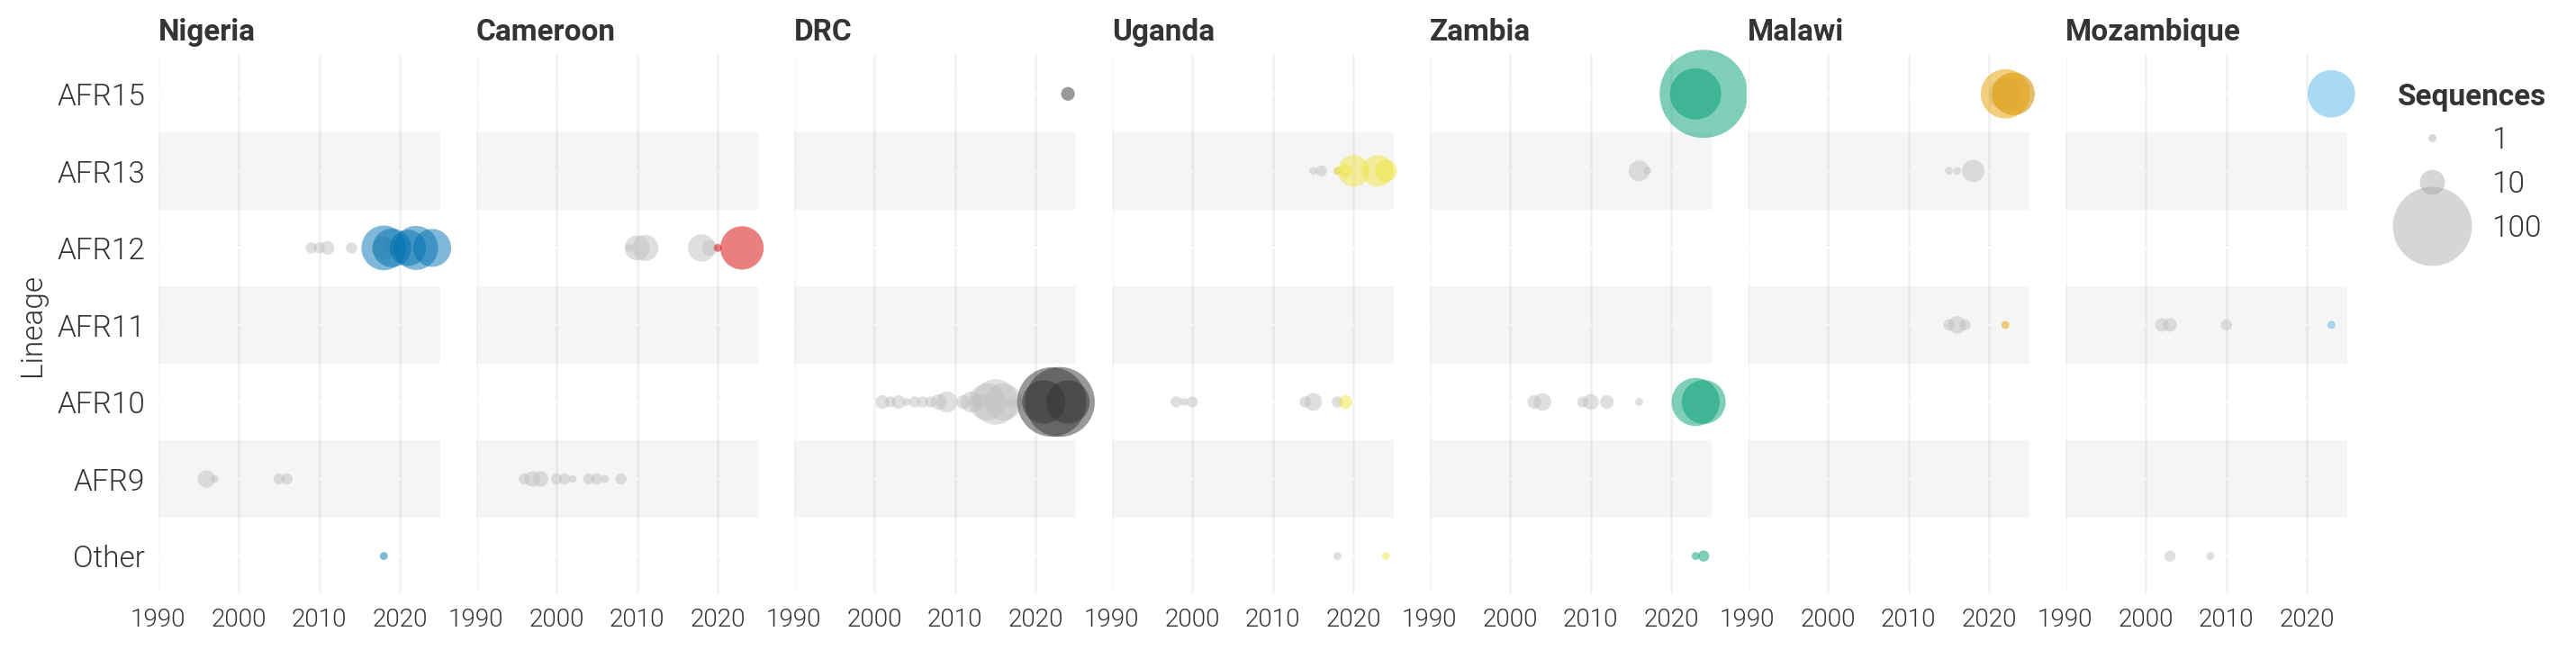

In [8]:
countries = ["Nigeria", "Cameroon", "Democratic Republic of the Congo", "Uganda", "Zambia", "Malawi", "Mozambique"]
lineage_order = ["sporadic", "T9","T10", "T11", "T12", "T13", "T15"]

fig, ax = plt.subplots( dpi=200, figsize=(14,3.5), ncols=len( countries ), sharex=True, sharey=True )
for col, country in enumerate( countries ):
    for workshop in [False, True]:
        entry = counts[workshop][country]
        for idx, lin in enumerate( lineage_order ):
            points = ax[col].scatter( entry.index, [idx]*len( entry.index ), s=entry[lin]*10, color=color_map[country] if workshop else "silver", linewidth=0, alpha=0.5, zorder=10 )
            points.set_clip_on( False )
    
    for i in range( 1, len( lineage_order ), 2):
        ax[col].axhspan( i-0.5,i+0.5, color="black", alpha=0.04, edgecolor=None, linewidth=0, zorder=5 )

    basic_formatting( ax[col], which="x", xlims=(1990,2025), ylims=(-0.5,6.5), spines=["left","bottom"], ylabel="Lineage", ysize=12, xsize=10 )
    ax[col].set_title( country if country != "Democratic Republic of the Congo" else "DRC", fontsize=12, loc="left", fontweight="bold" )
    ax[col].set_yticks( range( len( lineage_order ) ) )
    ax[col].set_yticklabels( [i.replace( "sporadic", "Other").replace( "T", "AFR" ) for i in lineage_order] )
    ax[col].set_xticks( [1990,2000,2010,2020] )
    ax[col].label_outer()
    
legend = [
    Line2D([0], [0], linestyle='none', marker='o', color="#999999", alpha=0.4, markeredgewidth=0, label="1", markersize=np.sqrt( 10 ) ),
    Line2D([0], [0], linestyle='none', marker='o', color="#999999", alpha=0.4, markeredgewidth=0, label="10", markersize=np.sqrt( 100 ) ),
    Line2D([0], [0], linestyle='none', marker='o', color="#999999", alpha=0.4, markeredgewidth=0, label="100", markersize=np.sqrt( 1000 ) )
]
legend = ax[-1].legend( title="Sequences", handles=legend, loc="upper right", bbox_to_anchor=(0,0,1.8,1), handletextpad=1, labelspacing=0.5, frameon=False, title_fontproperties={"size" : 12, "weight" : "bold" }, fontsize=12, edgecolor="None" )    

plt.tight_layout( pad=0.2)
plt.savefig( "plots/figure2-lineages-per-country-over-time.pdf", bbox_inches='tight' )
plt.show()